In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_users = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-bundych/shared/homeworks/python_ds_miniprojects/3/user_data.csv')
df_logs = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-bundych/shared/homeworks/python_ds_miniprojects/3/logs.csv')

In [3]:
df_logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [35]:
df_users.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [5]:
#наибольшее кол-во успешных операций по клиентам

success_logs_by_clien_count = df_logs \
                            .query('success == True') \
                            .groupby(by='client') \
                            .agg({'success': 'count'}) \
                            .sort_values(by='success', ascending=False) \
                            .rename(columns={'success': 'success_count'}) \
                            .reset_index()

#клиенты с наибольшим кол-вом успешных операций
success_logs_by_clien_count.head(9).sort_values(by='client')

,client,success_count
0,12179,41
8,28719,41
7,36165,41
2,52870,41
1,61468,41
3,61473,41
6,78349,41
5,82563,41
4,92584,41


In [6]:
#кол-во успешных операций по платформам

success_logs_by_platform_count = df_logs \
                            .query('success == True') \
                            .groupby(by='platform') \
                            .agg({'success': 'count'}) \
                            .sort_values(by='success', ascending=False) \
                            .reset_index() \
                            .rename(columns={'success': 'success_count'}) 
success_logs_by_platform_count

,platform,success_count
0,phone,2019
1,computer,1090
2,tablet,180


In [17]:
#предпочтения премиум пользователей по платформе

df_total = df_logs.merge(df_users, on='client', how='left')

premium_users_by_platform = df_total.query('premium == True') \
                            .groupby(by='platform', as_index=False) \
                            .agg({'success': 'count'}) \
                            .sort_values(by='success', ascending=False)
                            
premium_users_by_platform

,platform,success
1,phone,246
0,computer,150
2,tablet,24


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


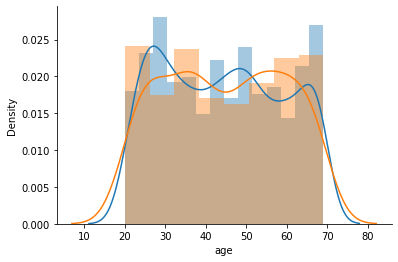

In [8]:
#распределение транзакций клиентов в зависимости от статуса по возрастам

log_non_premium = df_total.query('premium == False')
log_premium = df_total.query('premium == True')

sns.distplot(log_non_premium.age)
sns.distplot(log_premium.age)
sns.despine()
plt.show()

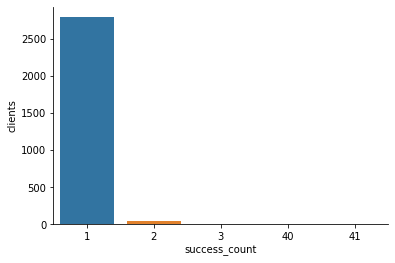

In [9]:
#распределение успешных операций

success_count = success_logs_by_clien_count.groupby('success_count', as_index=False).agg({'client': 'count'})

ax = sns.barplot(x='success_count', y='client', data=success_count)
ax.set(ylabel ='clients')
sns.despine()
plt.show()

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


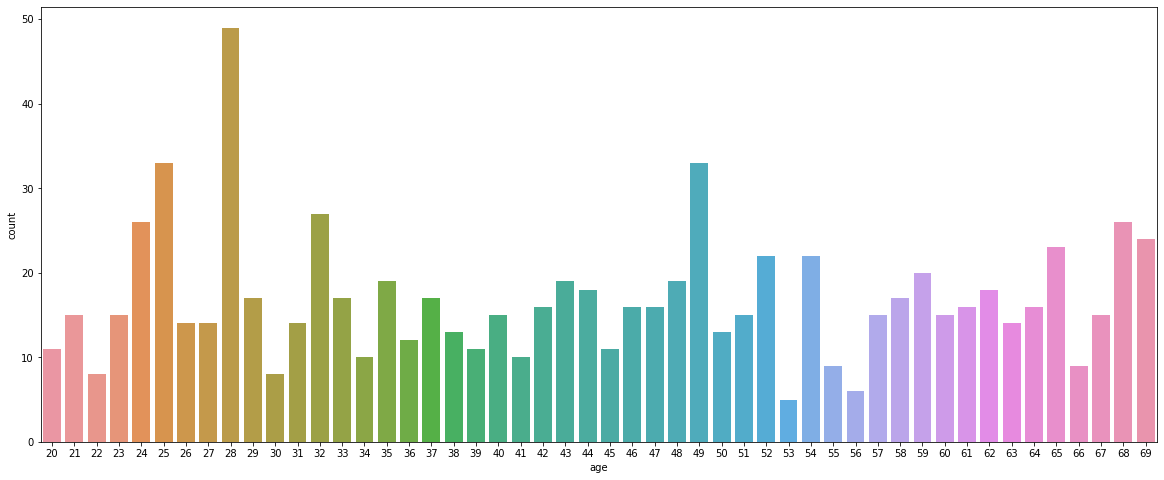

In [32]:
# распределение успешных операций на платформе computer
success_computer = df_total.query('platform == "computer" and success== True and age != "NaN"') 
                #.groupby(by='age', as_index=False) \
                #.agg({'client': 'count'})
success_computer['age'] = success_computer['age'].astype(int) 

plt.figure(figsize=(20, 8))        
sns.countplot(data=success_computer, x="age") #countplot не требует агрегирования данных. После агрегации можно строить barplot

In [33]:
df_total

,client,success,platform,time,premium,age
0,40177,True,phone,1585412212,NaN,NaN
1,61468,True,phone,1585425658,False,25.0
2,35604,False,phone,1585459894,True,65.0
3,9961,True,phone,1585400189,NaN,NaN
4,10931,True,computer,1585468629,False,28.0
...,...,...,...,...,...,...
4495,64496,False,computer,1585459072,False,66.0
4496,73299,True,phone,1585458370,NaN,NaN
4497,8967,True,phone,1585465121,False,33.0
4498,52880,False,phone,1585455362,NaN,NaN
